<h3>Problem Solving Agent</h3>



In [1]:
from graphviz import Graph
graph=Graph(strict=True)


In [2]:
problem,seq,goal=None,None,None
global problem, goal, seq

def ProblemSolvingAgent(percept,search,goal_test):
    
    seq=[]
    state=percept[0]
    state=updatestate(state,percept)
    goal=percept[1]

    if seq==[]:
        goal=formulategoal(state,percept)
        problem=formulateproblem(state,goal)
        seq=search(problem,goal)
        if seq==None:
            return None
        return seq

In [3]:
class Problem:
    def __init__(self,state,goal):
        self.state=state
        self.goal=goal
        
        
    def action(self,state):
            li=[]
            for i in df:
                if i[0]==state:
                    li.append([i[1],i[2]])
                   
                if i[1]==state:
                    li.append([i[0],i[2]])
                   
            return li
        
    def result(self,state,action):
        return action
    
    def stepcost(self,parent,action,seq):
        li=seq
        cost=0
        for i in li:
            if action==i[0]:
                cost=i[1]
        return cost
    
        
        
    
    
        

In [4]:
class ChildNode:
    def __init__(self,problem,state,action,parent,seq):
        if parent is None:
            self.state=problem.state
            self.parent,self.action,self.seq=None,None,None
            self.path_cost=0
        else:
            self.state=problem.result(parent.state,action)
            self.parent,self.action=parent,action
            self.path_cost=parent.path_cost+problem.stepcost(parent,action,seq)
            
            
    def __lt__(self,other):
   
       return self.path_cost<other.path_cost

In [5]:
def updatestate(state,percept):
    if state==percept[0]:
        return state
    else:
        return percept[0] 

In [6]:
def formulategoal(state,percept):
    return percept[1]

In [7]:
def formulateproblem(state,goal):
    temp=Problem(state,goal)
    return temp

In [8]:
def check(Node,frontier):
    for i in frontier.queue:
        if Node.state==i.state:
            return True
    return False

def check1(Node,frontier):
    for i in frontier.queue:
        if Node.state==i[1].state:
            return True
    return False

In [9]:
def path(node):
    path=[]
    print("Pathcost between two states is {}".format(node.path_cost))
    while node.parent !=None:
        path.append(node.state)
        node=node.parent
    path.append(node.state)
    ab=path[::-1]
   
    return ab


    
   

In [10]:
import pandas as pd
sheet=pd.read_excel('Indian_capitals.xlsx')
sheet.columns = ['A','B','C']
print(sheet)

              A                  B     C
0        Aizawl             Imphal   400
1    Amaravathi          Bangalore   663
2    Amaravathi            Chennai   448
3    Amaravathi        Bhubaneswar   819
4    Amaravathi             Raipur   758
5     Bangalore             Panaji   578
6     Bangalore            Chennai   333
7     Bangalore  Thiruvanathapuram   730
8     Bangalore             Mumbai   980
9        Bhopal        Gandhinagar   599
10  Bhubaneswar             Raipur   544
11  Bhubaneswar             Ranchi   455
12  Bhubaneswar            Kolkata   441
13   Chandigarh            Lucknow   742
14   Chandigarh             Jaipur   528
15      Chennai  Thiruvanathapuram   771
16     Dehradun            Lucknow   552
17       Dispur           Shillong    91
18       Dispur             Imphal   482
19       Dispur             Aizawl   462
20       Dispur           Agartala   536
21       Dispur           Itanagar   323
22       Dispur             Kohima   350
23    Hyderabad 

In [24]:
def goal_test(node, goal):
    if node == goal:
        return True
    else:
        return False

In [12]:
from pandas import DataFrame
import numpy as np
df=DataFrame(sheet)
df = df.replace(['Amaravathi','Bangalore'] ,['Amaravati','Bengaluru'])
df = np.array(df)
print(df)

[['Aizawl' 'Imphal' 400]
 ['Amaravati' 'Bengaluru' 663]
 ['Amaravati' 'Chennai' 448]
 ['Amaravati' 'Bhubaneswar' 819]
 ['Amaravati' 'Raipur' 758]
 ['Bengaluru' 'Panaji' 578]
 ['Bengaluru' 'Chennai' 333]
 ['Bengaluru' 'Thiruvanathapuram' 730]
 ['Bengaluru' 'Mumbai' 980]
 ['Bhopal' 'Gandhinagar' 599]
 ['Bhubaneswar' 'Raipur' 544]
 ['Bhubaneswar' 'Ranchi' 455]
 ['Bhubaneswar' 'Kolkata' 441]
 ['Chandigarh' 'Lucknow' 742]
 ['Chandigarh' 'Jaipur' 528]
 ['Chennai' 'Thiruvanathapuram' 771]
 ['Dehradun' 'Lucknow' 552]
 ['Dispur' 'Shillong' 91]
 ['Dispur' 'Imphal' 482]
 ['Dispur' 'Aizawl' 462]
 ['Dispur' 'Agartala' 536]
 ['Dispur' 'Itanagar' 323]
 ['Dispur' 'Kohima' 350]
 ['Hyderabad' 'Amaravati' 271]
 ['Hyderabad' 'Bengaluru' 569]
 ['Hyderabad' 'Raipur' 783]
 ['Hyderabad' 'Mumbai' 719]
 ['Imphal' 'Kohima' 136]
 ['Jaipur' 'Gandhinagar' 634]
 ['Jaipur' 'Bhopal' 598]
 ['Kohima' 'Itanagar' 323]
 ['Kolkata' 'Ranchi' 395]
 ['Kolkata' 'Patna' 583]
 ['Kolkata' 'Gangtok' 675]
 ['Kolkata' 'Dispur' 1035]


<h3> Breadth-ﬁrst search </h3>


In [13]:
import queue

def bfs(problem,goal):
    frontier=queue.Queue()
    
    node=ChildNode(problem,problem.state,None,None,None)
    
    frontier.put(node)
    
    explored_set=[]
    
    while not  frontier.empty():
       
        
        p_node=frontier.get()
        
        if goal_test(p_node.state,goal):
            return path(p_node)
        
        explored_set.append(p_node.state)
        
        sequence=problem.action(p_node.state)
        
        for i in sequence:
                
                child=ChildNode(problem,problem.state,i[0],p_node,sequence)
                
                if goal_test(p_node.state,goal):
                        return path(p_node)
                
                else:
                    
                    if  child.state not in explored_set  and  not check(child,frontier) :
                         frontier.put(child)
                    
            
        

<h3>Output</h3>

Pathcost between two states is 1018
['Agartala', 'Dispur', 'Imphal']


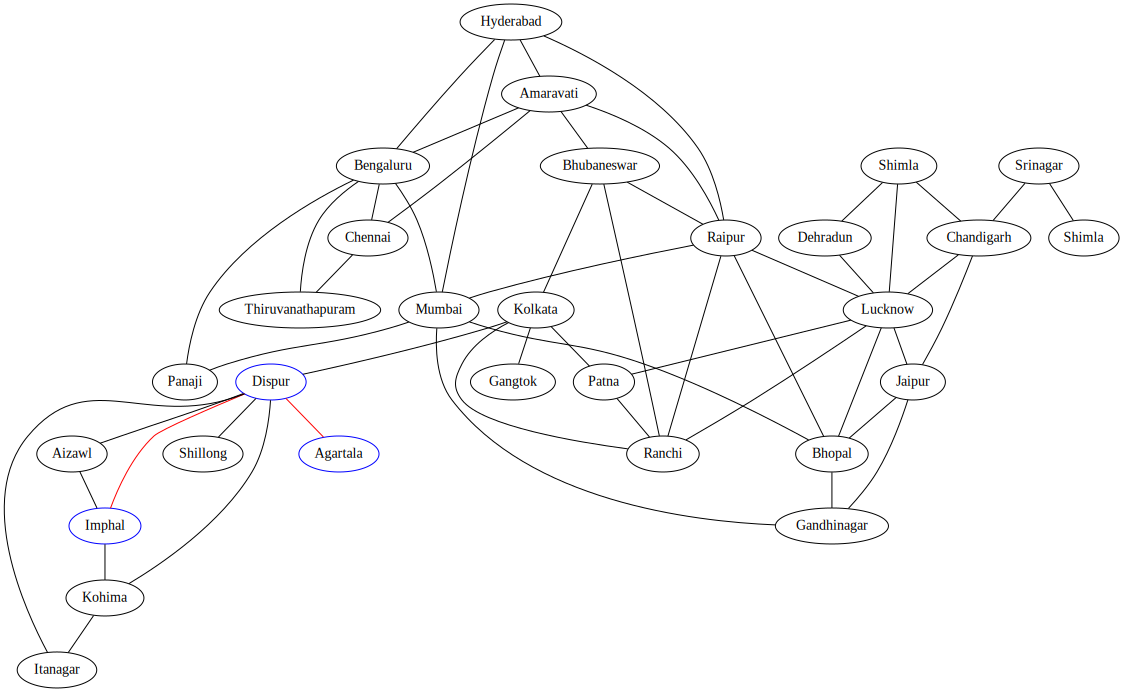

In [14]:
li=ProblemSolvingAgent(['Agartala','Imphal'],bfs,goal_test)
print(li)
for i in df:
    graph.node(i[0],i[0])
    graph.node(i[1],i[1])
for j in df:
    graph.edge(j[0],j[1])
for i in li:
    graph.node(i,i,color="blue")
for j in range(len(li)-1):
    graph.edge(li[j],li[j+1],color="red")
graph



<h3>Depth First Search</h3>

In [15]:
def dfs(problem,goal):
    frontier=queue.LifoQueue()
    
    node=ChildNode(problem,problem.state,None,None,None)
    
    frontier.put(node)
    
    explored_set=[]
    
    while not frontier.empty():
       
        
        p_node=frontier.get()
        
        if goal_test(p_node.state,goal):
            return path(p_node)
        
        explored_set.append(p_node.state)
        
        sequence=problem.action(p_node.state)
        
        for i in sequence:
            
                child=ChildNode(problem,problem.state,i[0],p_node,sequence)
                
                if  not check(child,frontier) and child.state not in explored_set:
                    
                         frontier.put(child)
                
                   

<h3>Output</h3>

Pathcost between two states is 5020
['Amaravati', 'Hyderabad', 'Mumbai', 'Bhopal', 'Lucknow', 'Patna', 'Kolkata', 'Dispur', 'Imphal']


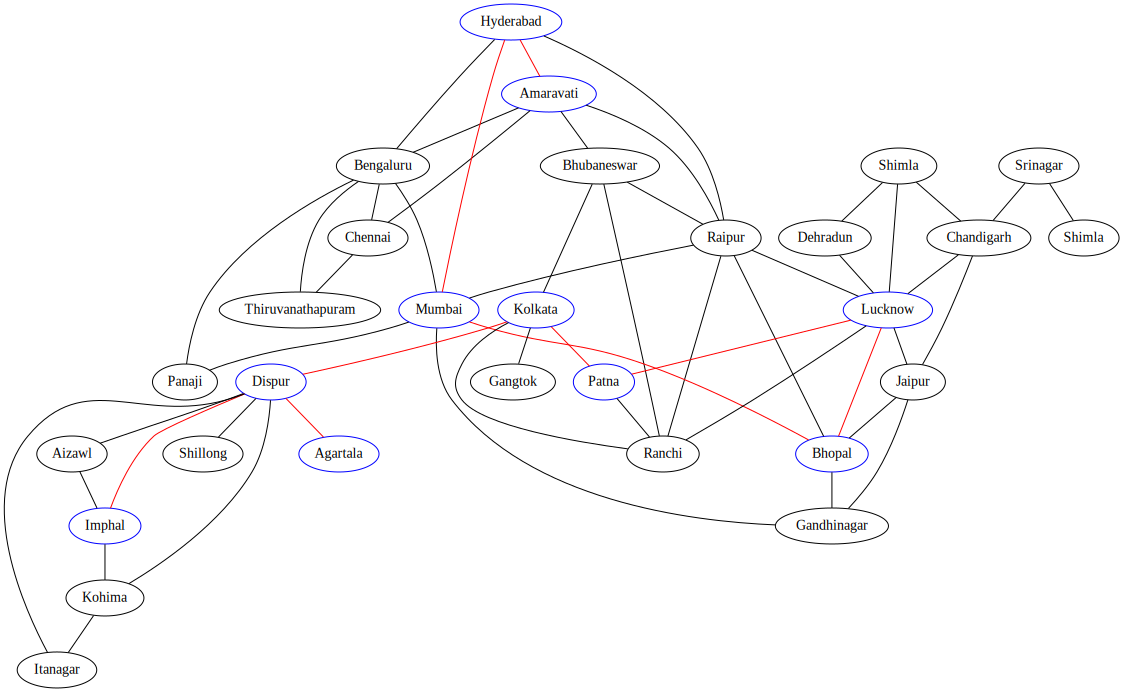

In [16]:
li=ProblemSolvingAgent(['Amaravati','Imphal'],dfs,goal_test)
print(li)
for i in df:
    graph.node(i[0],i[0])
    graph.node(i[1],i[1])
for j in df:
    graph.edge(j[0],j[1])
for i in li:
    graph.node(i,i,color="blue")
for j in range(len(li)-1):
    graph.edge(li[j],li[j+1],color="red")
graph

<h3>Bi-directional Search</h3>

In [18]:
def bds(problem,goal):
    frontier1=queue.Queue()
    
    node=ChildNode(problem,problem.state,None,None,None)
    
    frontier1.put(node)
    
    node1=ChildNode(problem,problem.goal,None,None,None)
    
    frontier2=queue.Queue()
    
    frontier2.put(node1)
    
    explored_set1=[]
    
    explored_set2=[]
    
    p3=[]
    
    while not  frontier1.empty() or not frontier2.empty():
        
        p_node=frontier1.get()
        g_node=frontier2.get()
        
        
        sequence1=problem.action(p_node.state)
        sequence2=problem.action(g_node.state)
        
        
        for i in sequence1:
               
                child1=ChildNode(problem,p_node.state,i[0],p_node,sequence1)
                
                if not check(child1,frontier1) and child1.state not in explored_set1:
                       frontier1.put(child1)
        
                        
                        
        for j in sequence2:
                
                child2=ChildNode(problem,g_node.state,j[0],g_node,sequence2)
                if not check(child2,frontier2) and child2.state not in explored_set2:
                        frontier2.put(child2)
                        
                        
        for i in frontier1.queue:
            for j in frontier2.queue:
                if i.state==j.state:
                    p1=path(i)
                    p2=path(j)
                    p2.pop(0)
                    p3=p2+p1
                    return p3
        
                       
        
        
        
                       

<h3>Output</h3>

Pathcost between two states is 663
Pathcost between two states is 663
['Bengaluru', 'Amaravati', 'Bengaluru']


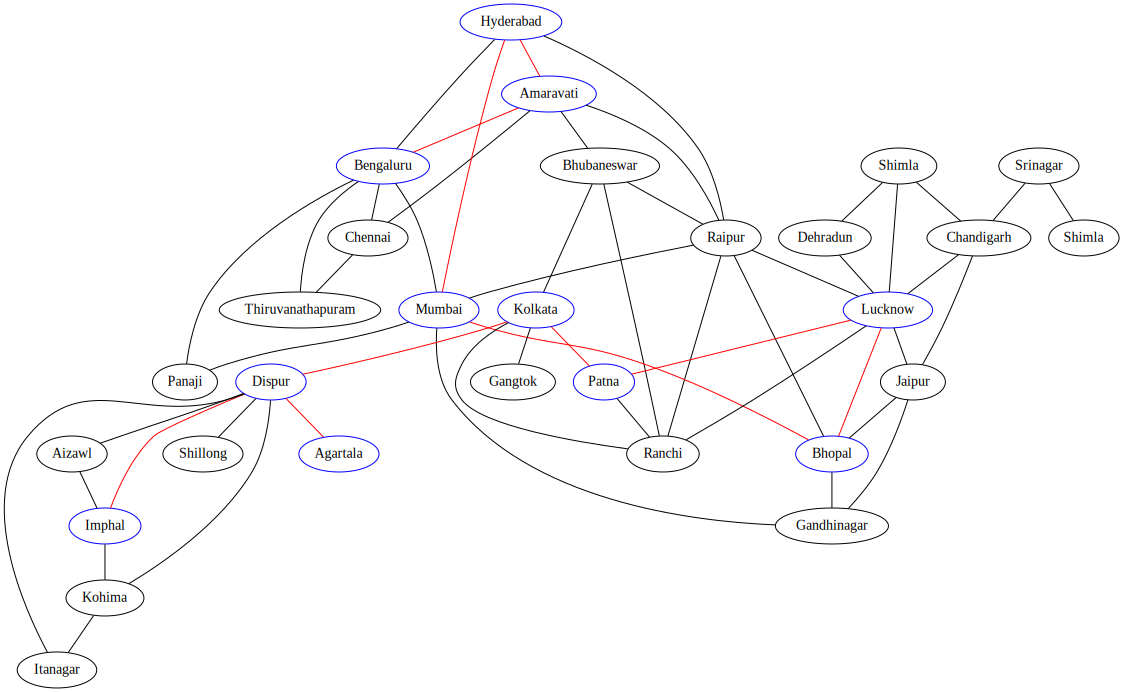

In [19]:
li=ProblemSolvingAgent(['Amaravati','Imphal'],bds,goal_test)
print(li)
for i in df:
    graph.node(i[0],i[0])
    graph.node(i[1],i[1])
for j in df:
    graph.edge(j[0],j[1])
for i in li:
    graph.node(i,i,color="blue")
for j in range(len(li)-1):
    graph.edge(li[j],li[j+1],color="red")
graph

In [20]:
from locationiq.geocoder import LocationIQ as iq
import json
import time
from math import radians,sin,cos,acos
geocoder=iq("8163e86e00c33d")

In [21]:


def heuristic(src,dest):
    src1 = geocoder.geocode(src+" India ")[0]
    dest1 = geocoder.geocode(dest+" India ")[0]
    slat = radians(float(src1['lat']))
    slon = radians(float(src1['lon']))
    elat = radians(float(dest1['lat']))
    elon = radians(float(dest1['lon']))
    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    return dist

In [22]:

def Astar(problem,goal):
    frontier = queue.PriorityQueue()
    
    node=ChildNode(problem,problem.state,None,None,None)
    
    frontier.put([heuristic(problem.state,goal),node])
   
    explored_set = []
    
    while not frontier.empty():
       
        p_node = frontier.get()
        
        time.sleep(1)
       
        if goal_test(p_node[1].state,goal):
            
            return path(p_node[1])
        
        explored_set.append(p_node[1].state)
        
        sequence = problem.action(p_node[1].state)
        
        for i in sequence :
            
            time.sleep(1)
            
           
           
            child=ChildNode(problem,p_node[1].state,i[0],p_node[1],sequence)
            
            if not check1(child,frontier) and child.state not in explored_set:
                
                heuristic_value= heuristic(child.state,goal)+child.path_cost
                
                frontier.put([heuristic_value,child])
                
            else:
                    if goal_test(p_node[1].state,goal):
                        
                         return path(p_node[1])
            
                
               
                
           

Pathcost between two states is 2777
['Amaravati', 'Bhubaneswar', 'Kolkata', 'Dispur', 'Imphal']


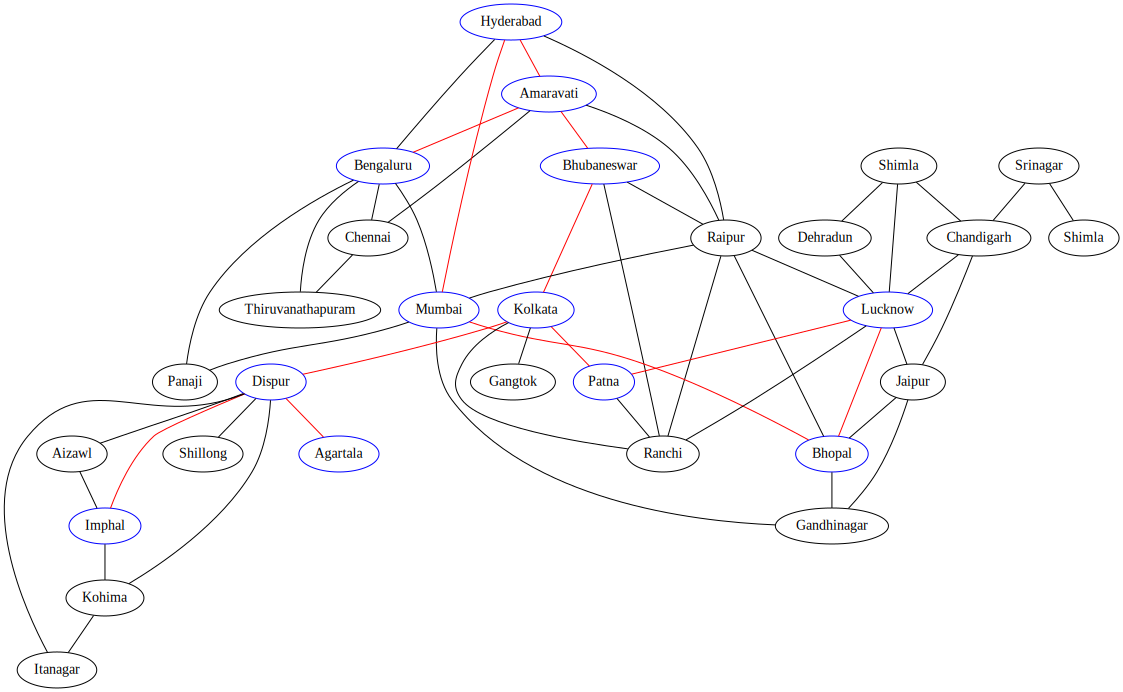

In [23]:
li=ProblemSolvingAgent(['Amaravati','Imphal'],Astar,goal_test)
print(li)
for i in df:
    graph.node(i[0],i[0])
    graph.node(i[1],i[1])
for j in df:
    graph.edge(j[0],j[1])
for i in li:
    graph.node(i,i,color="blue")
for j in range(len(li)-1):
    graph.edge(li[j],li[j+1],color="red")
graph

<h3>Puzzle Problem</h3>

In [9]:
import queue
from copy import deepcopy
import sys
import itertools
Goal =[[1, 2,3], [4, 5,6], [7, 8,0]]

        

In [10]:
def find(node):
    
    for i in range(3):
        for j in range(3):
            if node[i][j] == 0:
                return i, j
            

In [11]:
def Heuristic(node, goal):
    sum = 0
    for i in range(3):
        for j in range(3):
            value = node.state[i][j]
            for k in range(3):
                for l in range(3):
                    if value == goal[k][l]:
                        sum += abs(i-k) + abs(j-l)

    return sum

In [12]:
puzzleproblem ,goal,seq=None,None,None
def puzzleproblemSolvingAgent(percept,search,goal_test):
    global problem, goal, seq
    seq=[]
    state=percept[0]
    state=updatepuzzlestate(state,percept)
    goal=percept[1]

    if seq==[]:
        goal=formulatepuzzlegoal(state,percept)
      
        puzzleproblem=formulatepuzzleproblem(state,goal)
        seq=search(puzzleproblem,goal)
        if seq==None:
            return None
        return seq

In [13]:
class Puzzleproblem:
    
    def __init__(self, state, goal=Goal):
        self.state = state
        self.goal = goal

    def seqaction(self,state):
       
        list=[]
       
        if state[0][0] != 0 and state[1][0] != 0 and state[2][0] != 0 :
            res_node = deepcopy(state)
            i, j = find(res_node)
            res_node[i][j] = res_node[i][j-1]
            res_node[i][j-1] = 0
            list.append(res_node)


        if state[0][2] != 0 and state[1][2] != 0 and state[2][2] != 0:
            res_node = deepcopy(state)
            i, j = find(res_node)
            res_node[i][j] = res_node[i][j+1]
            res_node[i][j+1] = 0
            list.append(res_node)

             
        if state[0][0] != 0 and state[0][1] != 0 and state[0][2] != 0:
                res_node = deepcopy(state)
                i, j = find(res_node)
                res_node[i][j] = res_node[i-1][j]
                res_node[i-1][j] = 0
                list.append(res_node)
                
              

        if state[2][0] != 0 and state[2][1] != 0 and state[2][2] != 0:
                res_node = deepcopy(state)
                i, j = find(res_node)
                res_node[i][j] = res_node[i+1][j]
                res_node[i+1][j] = 0
                list.append(res_node)
              

        return list 

    def result(self,state,action):

         return action
        
    
    def stepcost(self,state,action):
        
        return 1
   
               


In [14]:
class ChildNode:
    def __init__(self,puzzleproblem,action,parent):
        if parent is None:
            self.state=puzzleproblem.state
            self.parent=None
            self.action=None
            self.path_cost=0
        else:
            self.state=puzzleproblem.result(parent.state,action)
            self.parent=parent
            self.action=action
            self.path_cost=parent.path_cost+puzzleproblem.stepcost(parent,action)
        
    def __lt__(self,other):
   
       return self.path_cost<other.path_cost


In [15]:
def check(Node,frontier):
    for child in frontier.queue:
        if Node.state==child.state:
            return True
    return False

<h3>Printing Path</h3>

In [16]:
def puzzlepath(node):
    path=[]
   
    while node.parent !=None:
        path.append(node.state)
        node=node.parent
    path.append(node.state)
    li= path[::-1]
    count=0
    for l in li:
        #print(l)
        #print()
        count=count+1

    return count

In [17]:
def check1(Node,frontier):
    for i in frontier.queue:
        if Node.state==i[1].state:
            return True
    return False

In [18]:
def updatepuzzlestate(state,percept):
    if state==percept[0]:
        return state
    else:
        return percept[0] 

In [19]:
def formulatepuzzlegoal(state,percept):
    
    return percept[1]

In [20]:
def formulatepuzzleproblem(state,goal):
    temp=Puzzleproblem(state,goal)
    return temp

<h3>Breadth First Search</h3>

In [36]:
import queue

def puzzlebfs(puzzleproblem,goal):
    
    frontier=queue.Queue()
    node=ChildNode(puzzleproblem,None,None)
    frontier.put(node)
   
    explored_set=[]
    while not frontier.empty():
       
        
        p_node=frontier.get()
        
        if goal_test(p_node.state,goal):
            
            return puzzlepath(p_node)
        
        explored_set.append(p_node.state)
        
        sequence=puzzleproblem.seqaction(p_node.state)
        
        
        for i in sequence:
               
                child=ChildNode(puzzleproblem,i,p_node)
                             
                
                if not check(child,frontier) and child.state not in explored_set:
                         frontier.put(child)
                         
                else:
                    if goal_test(p_node.state,goal):
                         return puzzlepath(p_node)
            
                

In [32]:


import numpy as np






for i in range(100):
             cd=puzzleproblemSolvingAgent([np.random.permutation([0,1,2,3,4,5,6,7,8]).reshape((3,3))],puzzlegbfs,goal_test)
             vis=dict(puzzle=randominput(),steps=cd)
             print(vis)
    


IndexError: list index out of range

<h3>Output</h3>

In [37]:
puzzleproblemSolvingAgent([np.random.permutation([0,1,2,3,4,5,6,7,8]).reshape((3,3)),puzzlebfs,goal_test)

[[1, 2, 3], [4, 0, 5], [6, 7, 8]]

[[1, 2, 3], [0, 4, 5], [6, 7, 8]]

[[0, 2, 3], [1, 4, 5], [6, 7, 8]]

[[2, 0, 3], [1, 4, 5], [6, 7, 8]]

[[2, 3, 0], [1, 4, 5], [6, 7, 8]]

[[2, 3, 5], [1, 4, 0], [6, 7, 8]]

[[2, 3, 5], [1, 0, 4], [6, 7, 8]]

[[2, 0, 5], [1, 3, 4], [6, 7, 8]]

[[0, 2, 5], [1, 3, 4], [6, 7, 8]]

[[1, 2, 5], [0, 3, 4], [6, 7, 8]]

[[1, 2, 5], [3, 0, 4], [6, 7, 8]]

[[1, 2, 5], [3, 4, 0], [6, 7, 8]]

[[1, 2, 0], [3, 4, 5], [6, 7, 8]]

[[1, 0, 2], [3, 4, 5], [6, 7, 8]]

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

No of steps 15


<h3>Depth first Search</h3>

In [38]:
def puzzledfs(puzzleproblem,goal):
    
    frontier=queue.LifoQueue()
    node=ChildNode(puzzleproblem,None,None)
    frontier.put(node)
   
    explored_set=[]
    while not  frontier.empty():
       
        
        p_node=frontier.get()
        
        if goal_test(p_node.state,goal):
            
            return puzzlepath(p_node)
        
        explored_set.append(p_node.state)
        
        sequence=puzzleproblem.seqaction(p_node.state)
        
        
        for i in sequence:
               
                child=ChildNode(puzzleproblem,i,p_node)
                             
                
                if not check(child,frontier) and child.state not in explored_set:
                         frontier.put(child)
                        
                else:
                    if goal_test(p_node.state,goal):
                       
                        return puzzlepath(p_node)
            
                         
                

<h3>Output</h3>

In [39]:
puzzleproblemSolvingAgent([ [[1, 2,3], [4, 0,5], [7,8, 6]],[[1,8,2], [4,6,3], [7,0,5]]],puzzledfs,goal_test)

[[1, 2, 3], [4, 0, 5], [7, 8, 6]]

[[1, 2, 3], [4, 8, 5], [7, 0, 6]]

[[1, 2, 3], [4, 8, 5], [7, 6, 0]]

[[1, 2, 3], [4, 8, 0], [7, 6, 5]]

[[1, 2, 0], [4, 8, 3], [7, 6, 5]]

[[1, 0, 2], [4, 8, 3], [7, 6, 5]]

[[1, 8, 2], [4, 0, 3], [7, 6, 5]]

[[1, 8, 2], [4, 6, 3], [7, 0, 5]]

No of steps 8


<h3>Greedy best first Search

In [22]:
def puzzlegbfs(puzzleproblem,goal):
    
    frontier=queue.PriorityQueue()
    node=ChildNode(puzzleproblem,None,None)
    frontier.put([0,node])
    
    explored_set=[]
    while  not frontier.empty():
       
        p_node=frontier.get()
        
        if goal_test(p_node[1].state,goal):
            
            return puzzlepath(p_node[1])
        
        explored_set.append(p_node[1].state)
     
        
        sequence=puzzleproblem.seqaction(p_node[1].state)
        
        
        for i in sequence:
               
                child=ChildNode(puzzleproblem,i,p_node[1])
                             
                
                if not check1(child,frontier) and child.state not in explored_set:
                         heuristic_value = Heuristic(child, goal)
                         frontier.put([heuristic_value,child])
                        
                         
                else:
                    if goal_test(p_node[1].state,goal):
                         return puzzlepath(p_node[1])
            

<h3>Output</h3>

In [41]:
puzzleproblemSolvingAgent([ [[7,2,4], [5,0, 6], [8,3, 1]],[[0,1, 2], [3,4, 5], [6,7, 8]]],puzzlegbfs,goal_test)

[[7, 2, 4], [5, 0, 6], [8, 3, 1]]

[[7, 2, 4], [5, 3, 6], [8, 0, 1]]

[[7, 2, 4], [5, 3, 6], [0, 8, 1]]

[[7, 2, 4], [0, 3, 6], [5, 8, 1]]

[[7, 2, 4], [3, 0, 6], [5, 8, 1]]

[[7, 2, 4], [3, 6, 0], [5, 8, 1]]

[[7, 2, 0], [3, 6, 4], [5, 8, 1]]

[[7, 0, 2], [3, 6, 4], [5, 8, 1]]

[[0, 7, 2], [3, 6, 4], [5, 8, 1]]

[[3, 7, 2], [0, 6, 4], [5, 8, 1]]

[[3, 7, 2], [6, 0, 4], [5, 8, 1]]

[[3, 7, 2], [6, 4, 0], [5, 8, 1]]

[[3, 7, 2], [6, 4, 1], [5, 8, 0]]

[[3, 7, 2], [6, 4, 1], [5, 0, 8]]

[[3, 7, 2], [6, 4, 1], [0, 5, 8]]

[[3, 7, 2], [0, 4, 1], [6, 5, 8]]

[[3, 7, 2], [4, 0, 1], [6, 5, 8]]

[[3, 7, 2], [4, 1, 0], [6, 5, 8]]

[[3, 7, 0], [4, 1, 2], [6, 5, 8]]

[[3, 0, 7], [4, 1, 2], [6, 5, 8]]

[[3, 1, 7], [4, 0, 2], [6, 5, 8]]

[[3, 1, 7], [4, 5, 2], [6, 0, 8]]

[[3, 1, 7], [4, 5, 2], [0, 6, 8]]

[[3, 1, 7], [0, 5, 2], [4, 6, 8]]

[[0, 1, 7], [3, 5, 2], [4, 6, 8]]

[[1, 0, 7], [3, 5, 2], [4, 6, 8]]

[[1, 7, 0], [3, 5, 2], [4, 6, 8]]

[[1, 7, 2], [3, 5, 0], [4, 6, 8]]

[[1, 7, 2], [3, 0, 5

<h3>ASTAR</h3>

In [42]:
def puzzleastar(puzzleproblem,goal):
    
    frontier=queue.PriorityQueue()
    node=ChildNode(puzzleproblem,None,None)
    frontier.put([0,node])
    
    explored_set=[]
    while  not frontier.empty():
       
        p_node=frontier.get()
        
        if goal_test(p_node[1].state,goal):
            
            return puzzlepath(p_node[1])
        
        explored_set.append(p_node[1].state)
     
        
        sequence=puzzleproblem.seqaction(p_node[1].state)
        
        
        for i in sequence:
               
                child=ChildNode(puzzleproblem,i,p_node[1])
                             
                
                if not check1(child,frontier) and child.state not in explored_set:
                         heuristic_value = Heuristic(child, goal)+child.path_cost
                         frontier.put([heuristic_value,child])
                        
                         
                else:
                    if goal_test(p_node[1].state,goal):
                         return puzzlepath(p_node[1])
            

<h3>Output</h3>

In [43]:
puzzleproblemSolvingAgent([ [[7,2,4], [5,0, 6], [8,3, 1]],[[0,1, 2], [3,4, 5], [6,7, 8]]],puzzleastar,goal_test)

[[7, 2, 4], [5, 0, 6], [8, 3, 1]]

[[7, 2, 4], [0, 5, 6], [8, 3, 1]]

[[0, 2, 4], [7, 5, 6], [8, 3, 1]]

[[2, 0, 4], [7, 5, 6], [8, 3, 1]]

[[2, 5, 4], [7, 0, 6], [8, 3, 1]]

[[2, 5, 4], [7, 3, 6], [8, 0, 1]]

[[2, 5, 4], [7, 3, 6], [0, 8, 1]]

[[2, 5, 4], [0, 3, 6], [7, 8, 1]]

[[2, 5, 4], [3, 0, 6], [7, 8, 1]]

[[2, 5, 4], [3, 6, 0], [7, 8, 1]]

[[2, 5, 0], [3, 6, 4], [7, 8, 1]]

[[2, 0, 5], [3, 6, 4], [7, 8, 1]]

[[0, 2, 5], [3, 6, 4], [7, 8, 1]]

[[3, 2, 5], [0, 6, 4], [7, 8, 1]]

[[3, 2, 5], [6, 0, 4], [7, 8, 1]]

[[3, 2, 5], [6, 4, 0], [7, 8, 1]]

[[3, 2, 5], [6, 4, 1], [7, 8, 0]]

[[3, 2, 5], [6, 4, 1], [7, 0, 8]]

[[3, 2, 5], [6, 4, 1], [0, 7, 8]]

[[3, 2, 5], [0, 4, 1], [6, 7, 8]]

[[3, 2, 5], [4, 0, 1], [6, 7, 8]]

[[3, 2, 5], [4, 1, 0], [6, 7, 8]]

[[3, 2, 0], [4, 1, 5], [6, 7, 8]]

[[3, 0, 2], [4, 1, 5], [6, 7, 8]]

[[3, 1, 2], [4, 0, 5], [6, 7, 8]]

[[3, 1, 2], [0, 4, 5], [6, 7, 8]]

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

No of steps 27
